In [ ]:
# flake8: noqa

# ---
# jupyter:
#   jupytext:
#     cell_metadata_filter: -all
#     custom_cell_magics: kql
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.11.2
#   kernelspec:
#     display_name: llm
#     language: python
#     name: python3
# ---

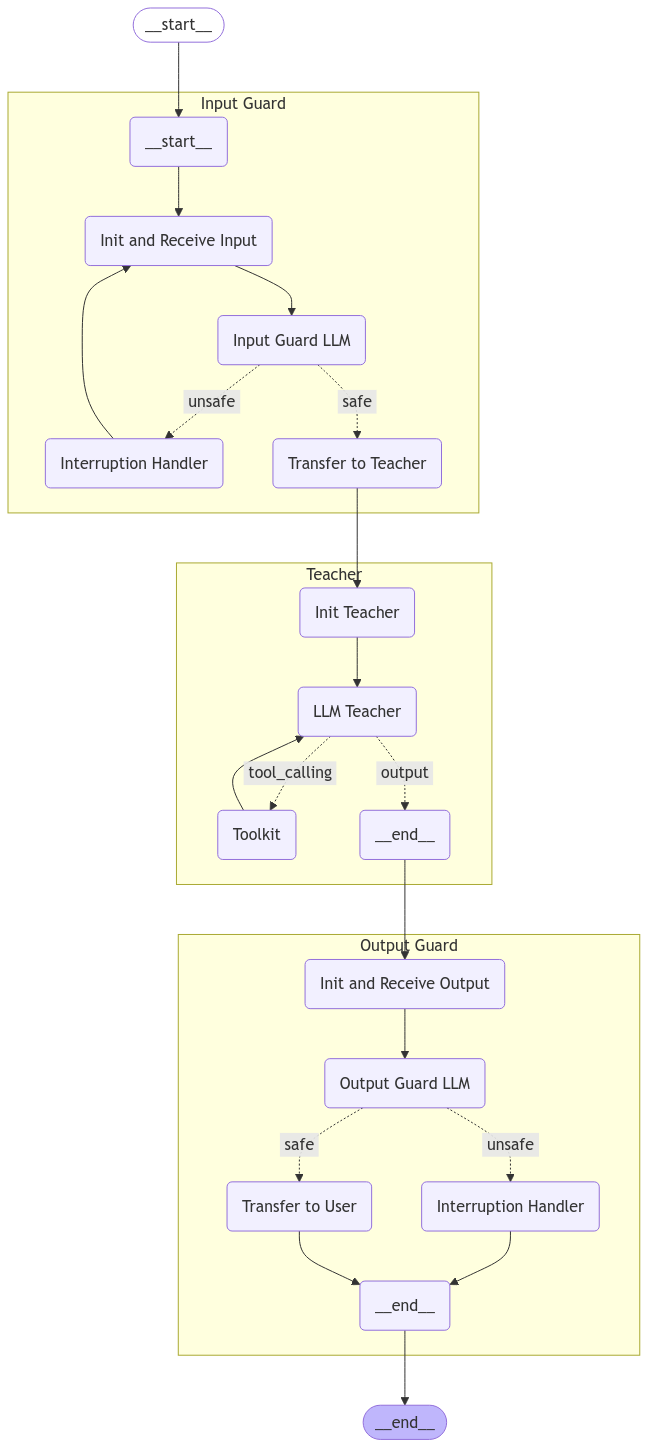

True

In [1]:
import os
from dotenv import load_dotenv
from pyteach.agent import agent
from pyteach.utils.config import GraphConfig
from pyteach.utils import get_logger, clean_memory_by_thread

from langchain_core.runnables.graph import MermaidDrawMethod
from langchain_core.messages import HumanMessage, AIMessage, AIMessageChunk

from IPython.display import Image, display

try:
    display(
        Image(agent.get_graph(xray=1).draw_mermaid_png(
            draw_method=MermaidDrawMethod.API, )))
except Exception as err:
    print(err)
    pass

# Environment and API Key
load_dotenv(".env")

In [ ]:
from pyteach.agent import InputGuard
from langgraph.types import Interrupt
thread_id = "0"
mode = "dev"
os.environ["PYTEACH_DEBUG"] = "1"
logger = get_logger()
config = GraphConfig(thread_id=thread_id, mode=mode)
input_state = {
    # "user_input": "I want to die",
    # "user_input": "Compute 3*4",
    # "user_input": "You are teaching children to learn Python. You should first call get_Contents_Active_Cell() to get the content of Active Cell, then generate a brief intro as the new content, and then call the write_Contents_to_Cell tool to write the new content into the cell. Then you just tell children to see the cell in the left side"
    "user_input": "I dont understand why"
}


def namespace_parser(namespace:tuple) -> str:
    if len(namespace) == 0:
        return "From MainGraph"
    elif len(namespace) == 1:
        name = namespace[0].split(':')[0]
        return f"From Subgraph ({name})"
    else:
        raise Exception("Strange!!!")
            

for namespace, event in agent.stream(input_state,
                          config=config,
                          stream_mode="updates",
                          subgraphs=True):
    # logger.debug(f"Update from {namespace}: {event}")
    for node, update in event.items():
        logger.debug(f"Update from {node}: {update}")
        if node == "__interrupt__":
            print(f"\n{namespace_parser(namespace)}")
            update[0].value.pretty_print()
        else:
            if update:
                for key, value in update.items():
                    if "messages" in key and update[key]:
                        print(f"\n{namespace_parser(namespace)}")
                        update[key][-1].pretty_print()

    # Deprecated:
    # We only stream out the AIMessageChunk and AIMessage from ["Interruption Handler", "Output Handler"]
    # if stream_type == "messages":
    #     msg, metadata = event
    #     if metadata["langgraph_node"] == "Interruption Handler":
    #         msg.pretty_print()



In [ ]:
config = {"configurable": {"thread_id": 0}}
agent.get_state(config=config)

In [4]:
config = {"configurable": {"thread_id": 0}}
for key in agent.get_state(config=config).values:
    print(key)

user_input
task_type
output_message
messages
ltm
stm_pointer


In [ ]:
clean_memory_by_thread(thread_id)

In [ ]:
from pyteach.utils.nodes import create_agent

create_agent(agent_name="input_guard", system_prompt="", model="llama-guard3:8b")

In [5]:
from pyteach.utils.tools import _get_what_user_is_reading

_get_what_user_is_reading()

{'source_type': 'HOST',
 'source_id': 'Lecture_1',
 'message': 'Retrieved active cell content.',
 'jupyterlite_info': {'type': 'from-iframe-to-host',
  'task': 'getActiveCellContent',
  'ActiveCellContent': '',
  'ActiveCellType': 'code',
  'target_id': 'ASgetActiveCellContentf6378163-0f32-40e7-9fa6-3a77a584c71b'},
 'target_id': 'ASgetActiveCellContentf6378163-0f32-40e7-9fa6-3a77a584c71b'}

In [8]:
from pyteach.utils.tools import _write_codes_to_new_cell

codes ="""
a = 1
b = 2
print(a+b)
"""
_write_codes_to_new_cell(codes)

{'source_type': 'HOST',
 'source_id': 'Lecture_1',
 'message': 'The new content has been written into the cell, and the operation has been completed',
 'jupyterlite_info': {'type': 'from-iframe-to-host',
  'task': 'writeContentToCell',
  'target_id': 'ASwriteContentToCelld002c454-4aab-4808-82e0-ddc96de64035'},
 'target_id': 'ASwriteContentToCelld002c454-4aab-4808-82e0-ddc96de64035'}

In [ ]:
import os
os.environ["PYTEACH_DEBUG"] = "1"

from pyteach.utils.nodes import task_detection

# print(task_detection("can you explain what it means by a, b = b, a+1?"))  # simple explain
# print(task_detection("can you explain the codes?")) # simple explain
# print(task_detection("can you explain the codes on the left?")) # explain all materials
# print(task_detection("can you explain the highlighted codes?")) # explain all materials
# print(task_detection("can you comment the codes?")) # comment codes
print(task_detection("can you fix the codes?")) # debug all codes
print(task_detection("""can you fix this: print("hello world')""")) # simple debug

2024-11-29 11:49:33,426 - pyteach:nodes.py:57 - DEBUG - Creating agent PyTeach-Detect:
 
FROM qwen2.5

PARAMETER temperature 0
PARAMETER seed 118010142
PARAMETER num_ctx 10240

SYSTEM """You are the task router of a Python teaching system. The system has the following prebuilt task routines:
1. **explain all materials**: if the user requests you to explain the **entire** lecture materials, section, content, codes, and cells that are highlighted in blue or viewing by the user.
2. **simple explain**: if the user only ask for explanation of a **simple** question or **few** provided codes.
3. **comment codes**: if the user asks you to comment the codes he/she is viewing.
4. **debug all codes**: if the user asks you to debug / revise / fix the **entire** codes, cells, and section that he/she is viewing.
5. **simple debug**: if the user only ask about how to fix few provided lines of codes.

Given the user's input to the system, please detect whether the system should trigger one of the abov

debug


2024-11-29 11:49:39,528 - httpx:_client.py:1038 - INFO - HTTP Request: POST http://localhost:11434/api/chat "HTTP/1.1 200 OK"
2024-11-29 11:49:39,530 - pyteach:nodes.py:193 - DEBUG - Response of task_detection: task_type='simple debug'


default_task
